<a href="https://colab.research.google.com/github/vivekchavan14/Face-Mask-Detection/blob/main/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face-Mask detection dataset

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
from zipfile import ZipFile
dataset = "/content/face-mask-dataset.zip"

with  ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The dataset is extracted")


The dataset is extracted


In [5]:
!ls

data		 face-mask-dataset.zip		  kaggle.json  sample_data
extracted_model  Face_Mask_Detectionrtatfinal.h5  pic.jpg


Importing the dependancies

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')

In [9]:
print('Number of with mask images', len(with_mask_files))
print('Number of without mask images', len(without_mask_files))

Number of with mask images 3725
Number of without mask images 3828


Creating labels for 2 class of images

with_mask -> 1
without_mask -> 0

In [10]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828



In [11]:
print(with_mask_labels[0:5])

[1, 1, 1, 1, 1]


In [12]:
print(without_mask_labels[0:5])

[0, 0, 0, 0, 0]


In [13]:
labels = with_mask_labels + without_mask_labels

In [14]:
print(len(labels))

7553


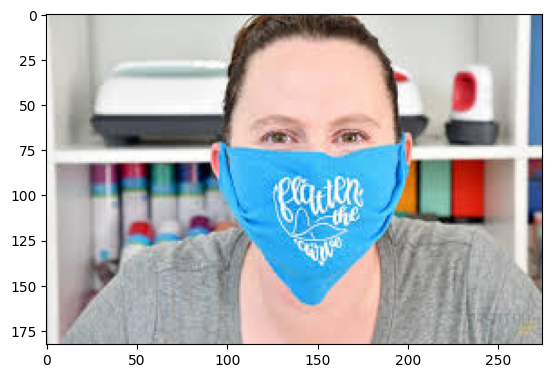

In [15]:
#displaying with mask image

img = mpimg.imread('/content/data/with_mask/with_mask_2690.jpg')
imgplot = plt.imshow(img)
plt.show()

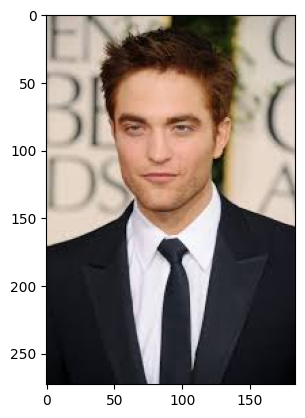

In [16]:
#displaying without mask images

img = mpimg.imread('/content/data/without_mask/without_mask_2690.jpg')
imgplot = plt.imshow(img)
plt.show()

Image processing:

1. Resize the images
2. Converting images into numpy arrays

In [17]:
with_mask_path = "/content/data/with_mask"
data = []

for img_file in with_mask_files:
    image = Image.open(os.path.join(with_mask_path, img_file))
    image = image.resize((128, 128)).convert('RGB')  # Resize and convert to RGB in a single line
    image = np.array(image)
    data.append(image)


without_mask_path = "/content/data/without_mask"

for img_file in without_mask_files:
    image = Image.open(os.path.join(without_mask_path, img_file))
    image = image.resize((128, 128)).convert('RGB')  # Resize and convert to RGB in a single line
    image = np.array(image)
    data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [18]:
type(data)

list

In [19]:
len(data)

7553

In [20]:
data[0]

array([[[151, 136, 105],
        [173, 158, 126],
        [190, 177, 145],
        ...,
        [240,  76, 117],
        [255,  98, 130],
        [227,  46,  70]],

       [[ 99,  83,  57],
        [103,  87,  61],
        [118, 102,  77],
        ...,
        [249,  68, 109],
        [251,  69, 105],
        [236,  44,  78]],

       [[154, 135, 117],
        [159, 139, 121],
        [163, 143, 126],
        ...,
        [230,  72,  96],
        [227,  77, 101],
        [212,  69,  93]],

       ...,

       [[237, 234, 214],
        [245, 241, 220],
        [245, 236, 215],
        ...,
        [100,  25,  37],
        [117,  40,  49],
        [133,  56,  63]],

       [[236, 243, 211],
        [241, 243, 212],
        [242, 241, 209],
        ...,
        [128,  40,  43],
        [139,  47,  42],
        [141,  48,  38]],

       [[235, 246, 211],
        [232, 244, 204],
        [230, 235, 195],
        ...,
        [154,  52,  54],
        [172,  60,  55],
        [167,  52,  43]]

In [21]:
type(data[0])

numpy.ndarray

In [22]:
data[0].shape

(128, 128, 3)

In [23]:
X = np.array(data)
Y = np.array(labels)

In [24]:
type(X)
type(Y)

numpy.ndarray

In [25]:
print(X.shape, Y.shape)

(7553, 128, 128, 3) (7553,)


Train-Test Split

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state = 2)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [28]:
#scaling of data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [29]:
X_train_scaled[0]

array([[[0.16862745, 0.17647059, 0.17254902],
        [0.14117647, 0.14901961, 0.14509804],
        [0.10196078, 0.10980392, 0.10588235],
        ...,
        [0.13333333, 0.14901961, 0.14509804],
        [0.1372549 , 0.15294118, 0.14901961],
        [0.14117647, 0.15686275, 0.15294118]],

       [[0.16078431, 0.16862745, 0.16470588],
        [0.17254902, 0.18039216, 0.17647059],
        [0.18823529, 0.19607843, 0.19215686],
        ...,
        [0.14509804, 0.16078431, 0.15686275],
        [0.13333333, 0.14901961, 0.14509804],
        [0.11372549, 0.12941176, 0.1254902 ]],

       [[0.05098039, 0.05882353, 0.05490196],
        [0.07058824, 0.07843137, 0.0745098 ],
        [0.09803922, 0.10588235, 0.10196078],
        ...,
        [0.14509804, 0.16078431, 0.15686275],
        [0.14509804, 0.16078431, 0.15686275],
        [0.14901961, 0.16470588, 0.16078431]],

       ...,

       [[0.36862745, 0.38039216, 0.40784314],
        [0.37647059, 0.38823529, 0.41568627],
        [0.34117647, 0

**Building CNN**

In [30]:
import tensorflow as tf
from tensorflow import keras

In [31]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(128, 128, 3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Flatten())  # Correct the case of 'Flatten'

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0,5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0,5))



model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [32]:
model.compile(optimizer='adam',  # Correct 'optimize' to 'optimizer'
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])  # Correct 'matrices' to 'metrics' and use 'accuracy'


In [33]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)


Epoch 1/5
170/170 [==============================] - 8s 20ms/step - loss: 0.5476 - accuracy: 0.8308 - val_loss: 0.3456 - val_accuracy: 0.8595
Epoch 2/5
170/170 [==============================] - 3s 15ms/step - loss: 0.2180 - accuracy: 0.9156 - val_loss: 0.2690 - val_accuracy: 0.9041
Epoch 3/5
170/170 [==============================] - 3s 15ms/step - loss: 0.1488 - accuracy: 0.9450 - val_loss: 0.2213 - val_accuracy: 0.9174
Epoch 4/5
170/170 [==============================] - 3s 15ms/step - loss: 0.0945 - accuracy: 0.9652 - val_loss: 0.2650 - val_accuracy: 0.9025
Epoch 5/5
170/170 [==============================] - 3s 16ms/step - loss: 0.0605 - accuracy: 0.9796 - val_loss: 0.2450 - val_accuracy: 0.9190


Model Evaluation

In [34]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print("Test Accuracy : ", accuracy)

48/48 [==============================] - 0s 8ms/step - loss: 0.2925 - accuracy: 0.9060
Test Accuracy :  0.9060224890708923


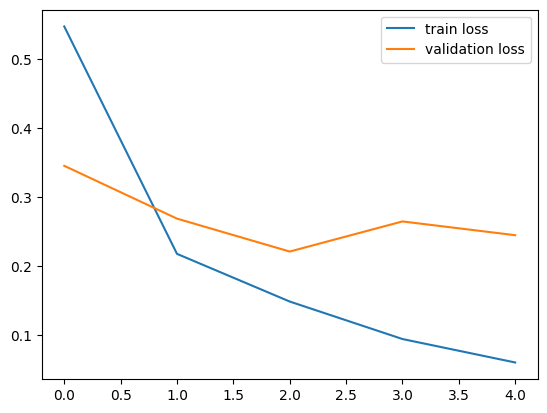

In [35]:
h = history

#plot loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

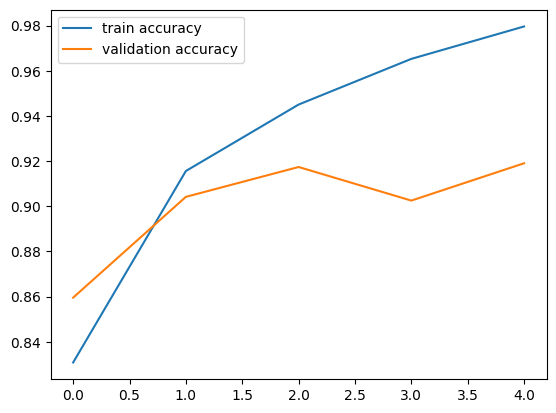

In [36]:
#plot accuracy value

plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

**PREDICTIONS**

In [37]:
from google.colab.patches import cv2_imshow

input_image_path = input('path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

# Display the image using 'cv2_imshow' from Google Colab patches
cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128, 128))
input_image_scaled = input_image_resized / 255.0
input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)

if input_pred_label == 1:
    print('The person in the image is wearing a mask')
else:
    print('The person in the image is not wearing a mask')


KeyboardInterrupt: Interrupted by user

In [42]:
!pip install opencv-python

In [43]:
!pip install --upgrade opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 11.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.8.0.76
    Uninstalling opencv-python-4.8.0.76:
      Successfully uninstalled opencv-python-4.8.0.76


In [44]:
model.save('Face_Mask_Detectionrtatfinal.h5')

In [45]:
import cv2
import numpy as np


# we Load the trained model
model = load_model('Face_Mask_Detectionrtatfinal.h5')


cap = cv2.VideoCapture(0)

while True:

    ret, frame = cap.read()


    if not ret:
        break


    frame_resized = cv2.resize(frame, (128, 128))
    frame_normalized = frame_resized / 255.0
    frame_input = np.expand_dims(frame_normalized, axis=0)


    predictions = model.predict(frame_input)


    threshold = 0.5
    if predictions[0][0] > threshold:
        result = "Mask"
    else:
        result = "No Mask"


    cv2.putText(frame, result, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)


    cv2.imshow('Face Mask Detection', frame)


    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


cap.release()
cv2.destroyAllWindows()